In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading the data
To get started let's first load in the data! We will make use of the helper functions provided in `data_utils.py`

In [2]:
from data_utils import get_images, get_labels

The following is the list of disasters in our dataset. 

In [3]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]

We will load each disaster train dataset into a dictionary. Recall that each disaster consists of images and labels (0 - 3) of the damage level.

In [4]:
data = {}
split = "train"
with open('config.json') as config_file:
    config = json.load(config_file)
    data_dir = "satellite-image-data"

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {"images": images, "labels": labels}

Let's visualize an image and its label in the dataset. 

In [5]:
#disaster_list[0] = hurricane matthew
disaster = disaster_list[0]
#data is a nested dictionary
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# index of the image to display
idx = 0
img = images[idx]
label = labels[idx]

plt.title(f"{disaster}, image {idx}, label {label}")
plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()

#
print(f"image shape: {img.shape}")

# Extracting Color Information
Each image is an RGB image represented as a numpy array of dimensions (width, height, 3). The last dimension corresponds to the RGB *color channels* in the image. We can split the image by color channels and visualize each of them individually.

In [6]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 1], cmap="Greens", vmin=0, vmax=255)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img[:, :, 2], cmap="Blues", vmin=0, vmax=255)
plt.title("Blue Channel")
plt.axis("off")

plt.show()

We can zoom in on just a pixel as well.

In [7]:
coord = (15, 35)
pixel_value = img[coord[0], coord[1], :]
pixel_image = np.array([[pixel_value]])

plt.imshow(pixel_image)
plt.axis("off")
plt.show()

print(f"Pixel value: {pixel_value}, coordinate: {coord}")

# Extracting Edge and Texture Information

So far we have considered the **color** information in an image. However, other important aspects of an image are the edges and texture. 

Let us consider some popular feature processing methods for extracting edge and texture information. We will use the utilities provided in `feature_utils.py`.

In [8]:
from feature_utils import get_sobel_features, get_gabor_features, generate_gabor_kernel, get_local_binary_pattern

Let's try the Sobel Edge Filter. 

Read more about Sobel edge detection: https://en.wikipedia.org/wiki/Sobel_operator and https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html

In [9]:
edges = get_sobel_features(img)
plt.imshow(edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

print(edges)

Now let's look at local binary patterns. 

Read more about LBP: https://en.wikipedia.org/wiki/Local_binary_patterns and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html

In [10]:
lbp = get_local_binary_pattern(img, radius=3)
plt.imshow(lbp, cmap="gray")
plt.axis("off")
plt.title("Local Binary Pattern (LBP)")
plt.show()

Another popular filter for image processing is the Gabor filter. The Gabor filters are a family of filters parametrized by orientation, frequency, bandwith, etc. Let's generate one such filter.

Read more about Gabor filters: https://en.wikipedia.org/wiki/Gabor_filter and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html

In [11]:
theta = 0
sigma = 1.0
frequency = 0.1

kernel = generate_gabor_kernel(theta, sigma, frequency)
gabor = get_gabor_features(img, kernel)

Let's visualize this filter (aka kernel) and the response of the image when we apply the filter. Concretely we are taking the convolution of the image with the filter. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for more details.

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot Gabor Kernel
axs[0].imshow(kernel, cmap="gray")
axs[0].axis("off")  # Remove axis
axs[0].set_title("Gabor Kernel")

# Plot Gabor Kernel Response
axs[1].imshow(gabor, cmap="gray")
axs[1].axis("off")  # Remove axis
axs[1].set_title("Gabor Kernel Response")

plt.show()

# Exploratory Data Analysis

The agency would like you to start performing some exploratory data analysis to build an initial understanding of the data. As part of the exploratory data analysis, the agency is interested in understanding certain aspects of the dataset better. 

Feel free to add more cells as you see fit for your analysis. 

## CLEANING DATASET

In [13]:
# Remove Duplicates
print(type(data)) # dictinoary
print(type(data["hurricane-matthew"])) # dictionary
print(type(data["hurricane-matthew"]["images"])) # list
print(type(data["hurricane-matthew"]["images"][0])) # ndarray

hurricane_image_list = data["hurricane-matthew"]["images"]
hurricane_unique_tuples = set()
hurricane_images_unique_list = []
for image in hurricane_image_list:
    
    image_tuple = tuple(image.flatten())
    if image_tuple not in hurricane_unique_tuples:
        hurricane_images_unique_list.append(image)
        hurricane_unique_tuples.add(image_tuple)


hurricane_unique_len = len(hurricane_images_unique_list)
hurricane_num_images_original = (len(hurricane_image_list))

hurricane_num_duplicates = hurricane_num_images_original - hurricane_unique_len
print("number of duplicate images in hurricane: ", hurricane_num_duplicates)

##finding duplicates for socal-fire
fire_image_list = data["socal-fire"]["images"]
fire_unique_tuples = set()
fire_images_unique_list = []
for image in fire_image_list:
    
    image_tuple = tuple(image.flatten())

    if image_tuple not in fire_unique_tuples:
        fire_images_unique_list.append(image)
        fire_unique_tuples.add(image_tuple)


fire_unique_len = len(fire_images_unique_list)
fire_num_images_original= len(fire_image_list)

fire_num_duplicates = fire_num_images_original - fire_unique_len
print("number of duplicate images in firee: ", hurricane_num_duplicates)

##duplicates for flooding

flooding_image_list = data["midwest-flooding"]["images"]
flooding_unique_tuples = set()
flooding_images_unique_list = []
for image in flooding_image_list:
    
    image_tuple = tuple(image.flatten())

    if image_tuple not in flooding_unique_tuples:
        flooding_images_unique_list.append(image)
        flooding_unique_tuples.add(image_tuple)


flooding_unique_len = len(flooding_images_unique_list)
flooding_num_images_original = (len(flooding_image_list))

flooding_num_duplicates = flooding_num_images_original - flooding_unique_len
print("number of duplicate images in flooding: ", flooding_num_duplicates)

## Create Dataframe for each disaster

In [14]:
flooding_df = pd.DataFrame()
fire_df = pd.DataFrame()
hurricane_df = pd.DataFrame()

#images column, each image is identified by its index

flooding_image_index = np.arange(0,len(flooding_image_list), 1)

flooding_df["image"] = flooding_image_index

fire_image_index = np.arange(0,len(fire_image_list), 1)

fire_df["image"] = fire_image_index

hurricane_image_index = np.arange(0,len(hurricane_image_list), 1)

hurricane_df["image"] = hurricane_image_index


# EDA - Basic Statistics

## Number of Images per Disaster Type


In [15]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]
num_images = []
images = data[disaster]["images"]


hurricane_num_images = len(hurricane_image_list)
print(f"Number of images for Hurricane-matthew: {hurricane_num_images}")


socal_fire_num_images = len(fire_image_list)
print(f"Number of images for socal-fire: {socal_fire_num_images}")

midwest_flooding_num_images = len(flooding_image_list)
print(f"Number of images for midwest-flooding: {midwest_flooding_num_images}")



In [16]:
type(data["socal-fire"]["images"])
#print(data["socal-fire"]["images"][1][1])

image = data["socal-fire"]["images"][1]

height, width, colors = image.shape

print(height, width, colors)



## Distribution of Image Sizes in Each Dataset

## Hurricane matthew distribution of image sizes

In [17]:
#find dimensions of images for hurricane matthew
matthew_heights = []
matthew_widths = []
matthew_colors = []



#get width and height for all images in hurricane matthew
for i in range (11151):

    image = data["hurricane-matthew"]["images"][i]
    height, width, color = image.shape
    matthew_heights.append(height)
    matthew_widths.append(width)
    matthew_colors.append(color)
    
#convert lists to arrays 

matthew_heights_arr = np.array(matthew_heights)
matthew_widths_arr = np.array(matthew_widths)

#calculate area
matthew_areas = matthew_heights_arr * matthew_widths_arr

#add these are features to the data frame
hurricane_df["image height"] = matthew_heights_arr
hurricane_df["image width"] = matthew_widths_arr
hurricane_df["image area"] = matthew_areas


bins = np.arange(min(matthew_areas), max(matthew_areas), 250)
plt.figure()
plt.hist(matthew_areas, bins = bins, density = True)
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(matthew_areas))
plt.ylabel("Density")
plt.title("Hurricane Matthew Image Size Distribution")
plt.show()

plt.figure()
plt.scatter(matthew_heights, matthew_widths)
plt.title("Hurricane Matthew images width as a function of height")
plt.xlabel("image height (pixels)")
plt.ylabel("image width (pixels)")
plt.show()

hurricane_df.head()

## So-Cal fire distribution of image sizes

In [18]:
#find dimensions of images for socal-fire
socal_heights = []
socal_widths = []
socal_colors = []
for i in range (8380):

    image = data["socal-fire"]["images"][i]
    height, width, color = image.shape
    socal_heights.append(height)
    socal_widths.append(width)
    socal_colors.append(color)

#convert lists to array
socal_heights_arr = np.array(socal_heights)
socal_widths_arr = np.array(socal_widths)

socal_areas = socal_heights_arr* socal_widths_arr

# Add features to Fire df
fire_df['image height'] = socal_heights_arr
fire_df['image width'] = socal_widths_arr
fire_df['image area'] = socal_areas



bins_socal = np.arange(min(socal_areas), max(socal_areas), 250)
plt.figure()
plt.hist(socal_areas, bins = bins_socal, density = True)
plt.xlim(0,max(socal_areas))
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(socal_areas))
plt.ylabel("Density")
plt.title("So-Cal fires Image Size Distribution")
plt.show()

plt.figure()
plt.scatter(socal_heights, socal_widths)
plt.title("Socal Fire Image Width as a function of height")
plt.xlabel("image height (pixels)")
plt.ylabel("image width (pixels)")
plt.show()

fire_df.head()

# Mid-west flooding distribution of image sizes

In [19]:
# find dimensions of images for mid-west flooding
flooding_heights = []
flooding_widths = []
flooding_colors = []
for i in range (7004):

    image = data["midwest-flooding"]["images"][i]
    height, width, color = image.shape
    flooding_heights.append(height)
    flooding_widths.append(width)
    flooding_colors.append(color)

# calculate area    
flooding_areas = np.array(flooding_heights) * np.array(flooding_widths)

flooding_df["image height"] = np.array(flooding_heights)
flooding_df["image width"] = np.array(flooding_widths)
flooding_df["image area"] = flooding_areas

bins_flooding = np.arange(min(flooding_areas), max(flooding_areas), 250)
plt.figure()
plt.hist(flooding_areas, bins = bins_flooding, density = True)
plt.xlabel("Image Area (pixels)")
plt.xlim(0,max(flooding_areas))
plt.ylabel("Density")
plt.title("Midwest-flooding Image Size Distribution")
plt.show()

flooding_df.head()

## Distribution of Damage Labels

## Distribution of Damage Labels Hurricane Matthew

In [20]:
#find all labels for hurricane matthew

#list to store all labels
matthew_damage_labels = []

for i in range (11151):

    label = data["hurricane-matthew"]["labels"][i]
    matthew_damage_labels.append(label)

hurricane_df["damage_labels"] = matthew_damage_labels

# calculate area    

bins = [-0.5, 0.5,1.5,2.5,3.5]

plt.figure()
plt.hist(matthew_damage_labels, bins = bins, density = True)
plt.xlabel("Damage label")
plt.xlim(0,max(matthew_damage_labels))
plt.ylabel("Density")
plt.xticks([-1,0, 1, 2, 3,4])
plt.title("Hurricane Matthew Damage Distribution")
plt.show()

#print(matthew_damage_labels)

hurricane_df.head()

## Distribution of Damage Labels So-Cal Fire

In [21]:
# Find labels for socal-fire
socal_damage_labels = []
for i in range (8380):

    label = data["socal-fire"]["labels"][i]
    socal_damage_labels.append(label)

fire_df["damage_labels"] = socal_damage_labels

socal_labels_bins = [-0.5,0.5,1.5,2.5,3.5]
plt.figure()
plt.hist(socal_damage_labels, bins = socal_labels_bins, density = True)
plt.xlim(0,max(socal_damage_labels))
plt.xticks([-1,0, 1, 2, 3,4])
plt.xlabel("Damage label")
plt.ylabel("Density")
plt.title("So-Cal fires Damage Label Distribution")
plt.show()

fire_df.head()

## Distribution of Damage Labels Midwest-flooding

In [22]:
# find labels for midwest-flooding
flooding_damage_labels = []
for i in range (7004):
    label = data["midwest-flooding"]["labels"][i]
    flooding_damage_labels.append(label)

flooding_df['damage_labels'] = flooding_damage_labels
flooding_label_bins = [-0.5, 0.5,1.5,2.5,3.5]
plt.figure()
plt.hist(flooding_damage_labels, bins = flooding_label_bins, density = True)
plt.xlabel("Level of Damage")
plt.xticks([-1,0, 1, 2, 3,4])
plt.ylabel("Density")
plt.title("Midwest-flooding Label Distribution")
plt.show()
flooding_df.head()

# EDA - Useful Image Features for Classification

The agency is looking for insights into useful image features for classifying images based on disaster type or damage level. You are tasked with verifying this and exploring whether color, edge, or texture features can effectively differentiate:

1. `midwest-flooding` from `socal-fire` images.
2. Damage levels 1 and 3 within the `hurricane-matthew` dataset.

Previous interns have found color information to be potentially useful.

## Distribution of Color (RGB)

In [23]:
first_img = data["midwest-flooding"]["images"][0]
height, width, color = first_img.shape

#height = rows

#width = columns

print(height, width)
j = len(data["midwest-flooding"]["images"][0])
print(j)

## Distribution of color Midwest-floodind

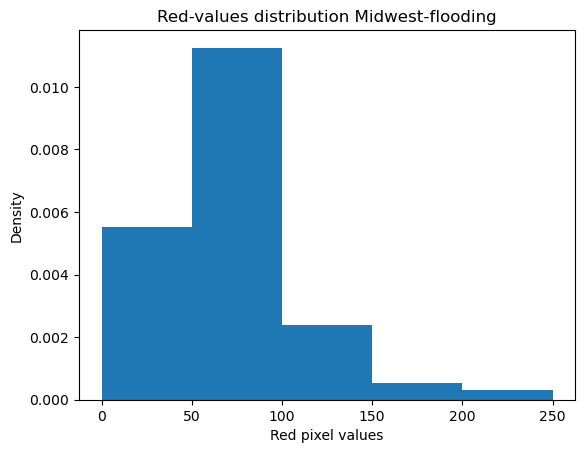

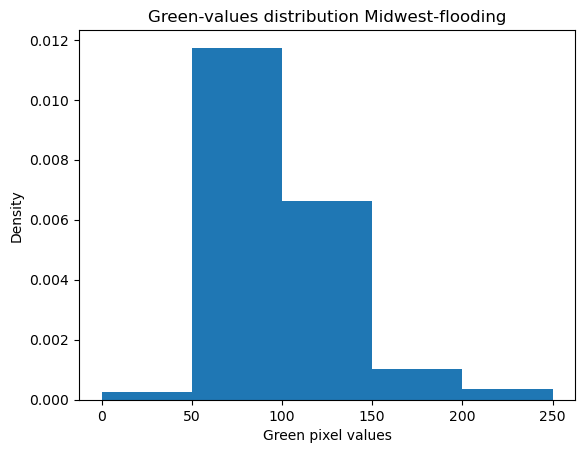

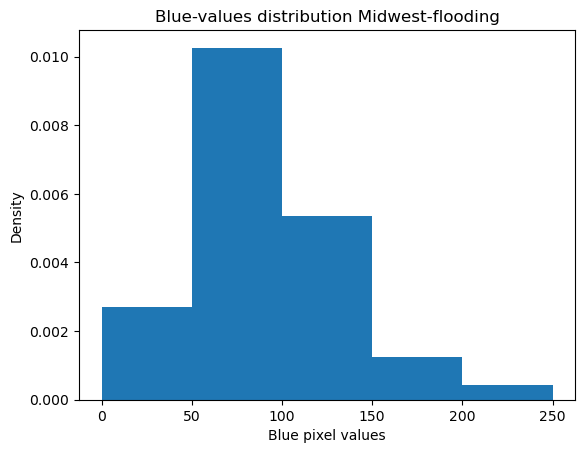

,image,image height,image width,image area,damage_labels,red avg values,green avg values,blue avg values,sobel edges avg,binary edges avg,red values,green values,blue values
0,0,42,176,7392,0,99.101461,99.101461,99.101461,0.023776,18.618803,99.101461,99.101461,99.101461
1,1,163,189,30807,0,92.032590,92.032590,92.032590,0.022366,18.618803,92.032590,92.032590,92.032590
2,2,72,72,5184,0,70.652585,70.652585,70.652585,0.026031,18.618803,70.652585,70.652585,70.652585
3,3,46,48,2208,0,122.410779,122.410779,122.410779,0.050201,18.618803,122.410779,122.410779,122.410779
4,4,80,63,5040,1,49.225397,49.225397,49.225397,0.027389,18.618803,49.225397,49.225397,49.225397


In [44]:
flooding_reds = []
flooding_greens = []
flooding_blues = []

flooding_red_avg_per_image = []
flooding_green_avg_per_image = []
flooding_blue_avg_per_image = []

        #i   , j   , n ,  
#images[image][row][pixel][RBG]
for i in range(7004): # index into each image
    image = data["midwest-flooding"]["images"][i]
    reds = []
    greens = []
    blues = []
    for j in range(image.shape[0]): # index into each row, j is row
        for n in range(image.shape[1]): # each pixel, n is column
            flooding_reds.append(data["midwest-flooding"]["images"][i][j][n][0])
            reds.append(data["midwest-flooding"]["images"][i][j][n][0])
            flooding_greens.append(data["midwest-flooding"]["images"][i][j][n][1])
            greens.append(data["midwest-flooding"]["images"][i][j][n][0])
            flooding_blues.append(data["midwest-flooding"]["images"][i][j][n][2])
            blues.append(data["midwest-flooding"]["images"][i][j][n][0])
            
    flooding_red_avg_per_image.append(np.mean(reds))
    flooding_green_avg_per_image.append(np.mean(greens))
    flooding_blue_avg_per_image.append(np.mean(blues))



flooding_df["red values"] = flooding_red_avg_per_image
flooding_df["green values"] = flooding_green_avg_per_image
flooding_df["blue values"] = flooding_blue_avg_per_image

color_bins = np.arange(0, 255, 50)

plt.figure()
plt.hist(flooding_reds, bins = color_bins, density = True)
plt.xlabel("Red pixel values")
plt.ylabel("Density")
plt.title("Red-values distribution Midwest-flooding")
plt.show()


plt.figure()
plt.hist(flooding_greens, bins = color_bins, density = True)
plt.xlabel("Green pixel values")
plt.ylabel("Density")
plt.title("Green-values distribution Midwest-flooding")
plt.show()

plt.figure()
plt.hist(flooding_blues, bins = color_bins, density = True)
plt.xlabel("Blue pixel values")
plt.ylabel("Density")
plt.title("Blue-values distribution Midwest-flooding")
plt.show()

flooding_df.head()

## Distribution of color for Hurricane-Matthew

In [25]:
matthew_reds = []
matthew_greens = []
matthew_blues = []

matthew_red_avg_per_image = []
matthew_green_avg_per_image = []
matthew_blue_avg_per_image = []
        #i   , j   , n ,  
#images[image][row][pixel][RBG]
for i in range(11151): # index into each image
    image = data["hurricane-matthew"]["images"][i]
    reds = []
    greens = []
    blues = []
    for j in range(image.shape[0]): # index into each row, j is row
        for n in range(image.shape[1]): # each pixel, n is column
            matthew_reds.append(data["hurricane-matthew"]["images"][i][j][n][0])
            reds.append(data["hurricane-matthew"]["images"][i][j][n][0])
            matthew_greens.append(data["hurricane-matthew"]["images"][i][j][n][1])
            greens.append(data["hurricane-matthew"]["images"][i][j][n][1])
            matthew_blues.append(data["hurricane-matthew"]["images"][i][j][n][2])
            blues.append(data["hurricane-matthew"]["images"][i][j][n][2])

    matthew_red_avg_per_image.append(np.mean(reds))
    matthew_green_avg_per_image.append(np.mean(greens))
    matthew_blue_avg_per_image.append(np.mean(blues))



hurricane_df["red values"] = matthew_red_avg_per_image
hurricane_df["green values"] = matthew_green_avg_per_image
hurricane_df["blue values"] = matthew_blue_avg_per_image

color_bins = np.arange(0, 255, 50)

plt.figure()
plt.hist(matthew_reds, bins = color_bins, density = True)
plt.xlabel("Red pixel values")
plt.ylabel("Density")
plt.title("Red-values distribution Hurricane-Matthew")
plt.show()


plt.figure()
plt.hist(matthew_greens, bins = color_bins, density = True)
plt.xlabel("Green pixel values")
plt.ylabel("Density")
plt.title("Green-values distribution Hurricane-Matthew")
plt.show()

plt.figure()
plt.hist(matthew_blues, bins = color_bins, density = True)
plt.xlabel("Blue pixel values")
plt.ylabel("Density")
plt.title("Blue-values distribution Hurricane-Matthew")
plt.show()

hurricane_df.head()

In [45]:
hurricane_df["red values"] = matthew_red_avg_per_image
hurricane_df["green values"] = matthew_green_avg_per_image
hurricane_df["blue values"] = matthew_blue_avg_per_image

## Distribution of colors for So-Cal Fires

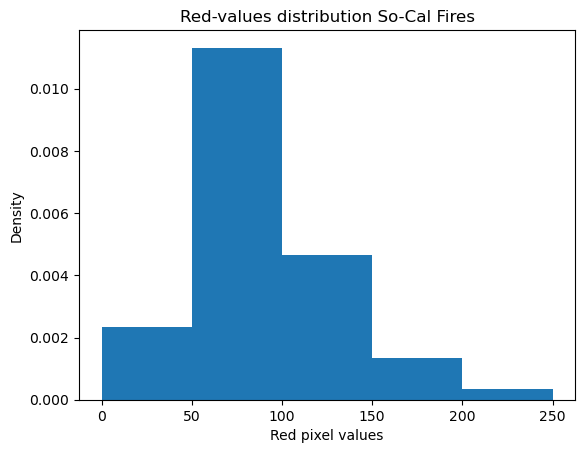

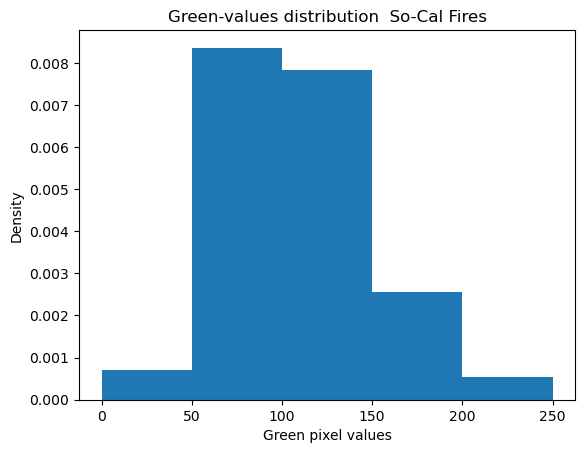

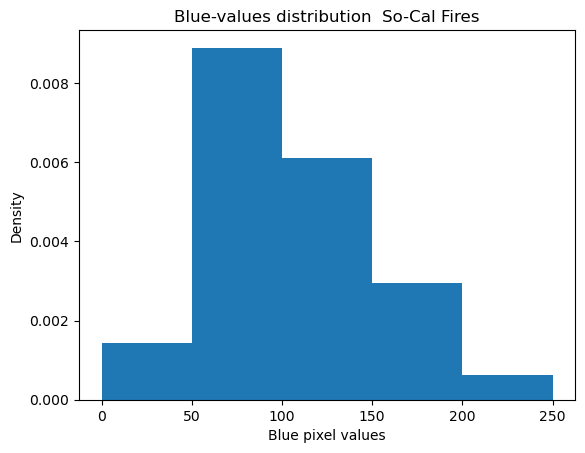

In [26]:
socal_reds = []
socal_greens = []
socal_blues = []

socal_red_avg_per_image = []
socal_green_avg_per_image = []
socal_blue_avg_per_image = []

        #i   , j   , n ,  
#images[image][row][pixel][RBG]
for i in range(8380): # index into each image
    image = data["socal-fire"]["images"][i]
    reds = []
    greens = []
    blues = []
    for j in range(image.shape[0]): # index into each row, j is row
        for n in range(image.shape[1]): # each pixel, n is column
            socal_reds.append(data["socal-fire"]["images"][i][j][n][0])
            reds.append(data["socal-fire"]["images"][i][j][n][0])
            socal_greens.append(data["socal-fire"]["images"][i][j][n][1])
            greens.append(data["socal-fire"]["images"][i][j][n][1])
            socal_blues.append(data["socal-fire"]["images"][i][j][n][2])
            blues.append(data["socal-fire"]["images"][i][j][n][2])

    socal_red_avg_per_image.append(np.mean(reds))
    socal_green_avg_per_image.append(np.mean(greens))
    socal_blue_avg_per_image.append(np.mean(blues))

color_bins = np.arange(0, 255, 50)

fire_df["red value"] = socal_red_avg_per_image
fire_df["green value"] = socal_green_avg_per_image
fire_df["blue value"] = socal_blue_avg_per_image

plt.figure()
plt.hist(socal_reds, bins = color_bins, density = True)
plt.xlabel("Red pixel values")
plt.ylabel("Density")
plt.title("Red-values distribution So-Cal Fires")


plt.figure()
plt.hist(socal_greens, bins = color_bins, density = True)
plt.xlabel("Green pixel values")
plt.ylabel("Density")
plt.title("Green-values distribution  So-Cal Fires")
plt.show()

plt.figure()
plt.hist(socal_blues, bins = color_bins, density = True)
plt.xlabel("Blue pixel values")
plt.ylabel("Density")
plt.title("Blue-values distribution  So-Cal Fires")
plt.show()

In [64]:
fire_df["red value"] = socal_red_avg_per_image
fire_df["green value"] = socal_green_avg_per_image
fire_df["blue value"] = socal_blue_avg_per_image
fire_df.head()

,image,image height,image width,image area,damage_labels,red avg value,green avg value,blue avg value,sobel edges avg,binary edges avg,red value,green value,blue value,sobel edges max,sobel edges min,binary edges median,bianry edges max,binary edges min
0,0,144,195,28080,0,110.409046,131.513390,126.103811,0.048752,18.618803,110.409046,131.513390,126.103811,0.411398,0.000155,25.0,25.0,0.0
1,1,48,51,2448,0,70.399918,89.844771,87.334559,0.046197,18.618803,70.399918,89.844771,87.334559,0.468681,0.000665,25.0,25.0,0.0
2,2,104,140,14560,0,97.319162,122.642376,111.622184,0.043064,18.618803,97.319162,122.642376,111.622184,0.468500,0.000202,25.0,25.0,0.0
3,3,128,138,17664,0,96.571841,113.395041,108.018512,0.044347,18.618803,96.571841,113.395041,108.018512,0.385318,0.000071,25.0,25.0,0.0
4,4,65,96,6240,0,76.582532,103.573878,99.056731,0.037459,18.618803,76.582532,103.573878,99.056731,0.375931,0.000006,25.0,25.0,0.0


## Distribution of Sobel Edges

# distribution of Sobel edges hurricane-matthew

Text(0.5, 1.0, 'Edge distribution Hurricane-Matthew')

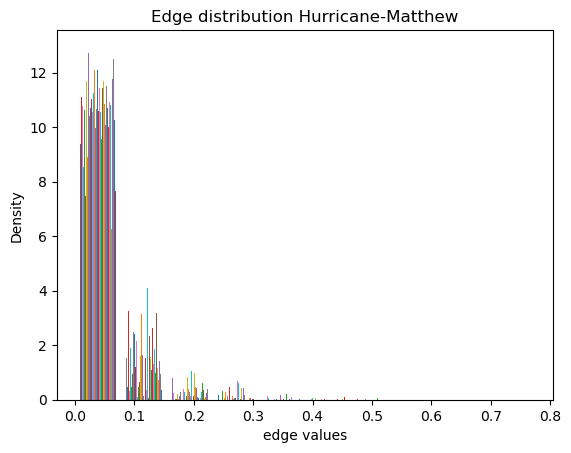

In [51]:
hurricane_sobel_edges_agg = []
matthew_edges_list = []
hurricane_sobel_max = []
hurricane_sobel_min = []
for i in range(11151):
    img_edges = get_sobel_features(data["hurricane-matthew"]["images"][i])
    matthew_edges_list.append(img_edges.flatten())
    hurricane_sobel_edges_agg.append(np.mean(img_edges))
    hurricane_sobel_max.append(np.max(img_edges))
    hurricane_sobel_min.append(np.min(img_edges))

#edges_bins = np.arange(min(flatten_edges), max(flatten_edges), 25)
hurricane_df["sobel edges avg"] = hurricane_sobel_edges_agg
hurricane_df["sobel edges min"] = hurricane_sobel_min
hurricane_df["sobel edges max"] = hurricane_sobel_max

plt.figure()
plt.hist(matthew_edges_list, density = True)
plt.xlabel("edge values")
plt.ylabel("Density")
plt.title("Edge distribution Hurricane-Matthew")


## distribution of sobel edges flooding

In [52]:
hurricane_df.head()

,image,image height,image width,image area,damage_labels,red values,green values,blue values,sobel edges avg,binary edges avg,sobel edges min,sobel edges max
0,0,65,54,3510,3,75.702279,105.275783,101.084046,0.057136,18.618803,4.000296e-04,0.465451
1,1,67,105,7035,0,88.451599,119.422886,110.248330,0.037588,18.618803,4.098236e-04,0.297037
2,2,54,56,3024,1,111.971561,122.160714,119.043320,0.066945,18.618803,8.475130e-04,0.531265
3,3,114,124,14136,0,96.979697,128.503962,127.725382,0.025929,18.618803,1.962616e-17,0.410588
4,4,58,51,2958,2,87.179851,108.778905,96.311359,0.064856,18.618803,6.472394e-04,0.418363


Text(0.5, 1.0, 'Edge distribution midwest-flooding')

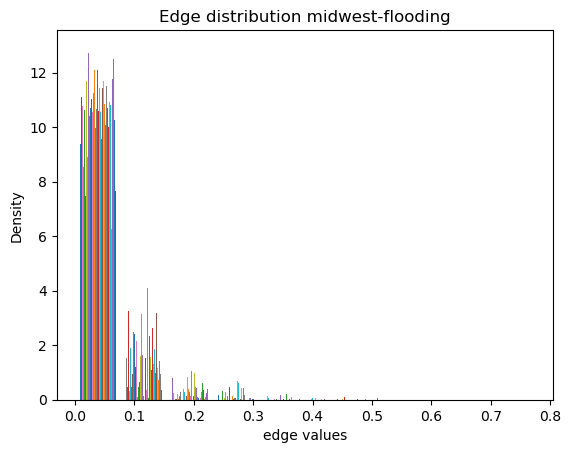

In [53]:
flooding_edges_list = []
flooding_sobel_edges_agg = []
flooding_sobel_max = []
flooding_sobel_min = []
for i in range(len(flooding_image_list)):
    img_edges = get_sobel_features(data["midwest-flooding"]["images"][i])
    flooding_edges_list.append(img_edges.flatten())
    flooding_sobel_edges_agg.append(np.mean(img_edges))
    flooding_sobel_max.append(np.max(img_edges))
    flooding_sobel_min.append(np.min(img_edges))

#edges_bins = np.arange(min(flatten_edges), max(flatten_edges), 25)

flooding_df['sobel edges avg'] = flooding_sobel_edges_agg
flooding_df['sobel edges max'] = flooding_sobel_max
flooding_df['sobel edges min'] = flooding_sobel_min

plt.figure()
plt.hist(matthew_edges_list, density = True)
plt.xlabel("edge values")
plt.ylabel("Density")
plt.title("Edge distribution midwest-flooding")

## Distribution of sobel edges fire

Text(0.5, 1.0, 'Edge distribution socal-fire')

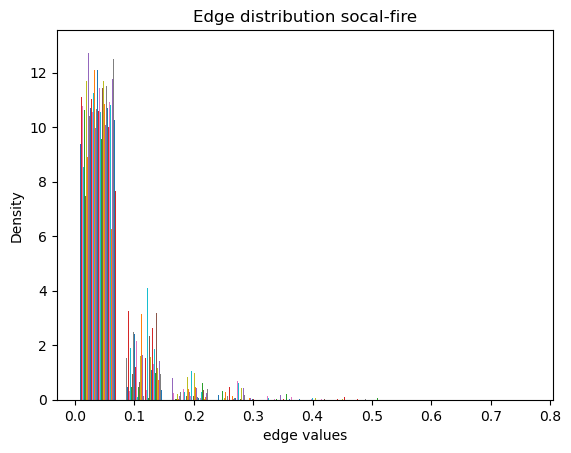

In [56]:
fire_sobel_edges_agg = []
fire_edges_list = []
fire_sobel_max = []
fire_sobel_min = []

for i in range(len(fire_image_list)):
    img_edges = get_sobel_features(data["socal-fire"]["images"][i])
    fire_edges_list.append(img_edges.flatten())
    fire_sobel_edges_agg.append(np.mean(img_edges))
    fire_sobel_max.append(np.max(img_edges))
    fire_sobel_min.append(np.min(img_edges))

fire_df["sobel edges avg"] = fire_sobel_edges_agg
fire_df["sobel edges max"] = fire_sobel_max
fire_df["sobel edges min"] = fire_sobel_min
#edges_bins = np.arange(min(flatten_edges), max(flatten_edges), 25)

plt.figure()
plt.hist(matthew_edges_list, density = True)
plt.xlabel("edge values")
plt.ylabel("Density")
plt.title("Edge distribution socal-fire")

## Local Binary Patterns

## Hurricane-Matthew LBP

[[3. 4. 1. ... 1. 5. 2.]
 [0. 1. 4. ... 8. 0. 3.]
 [5. 9. 6. ... 8. 9. 5.]
 ...
 [0. 7. 3. ... 6. 1. 0.]
 [1. 8. 5. ... 8. 5. 9.]
 [9. 2. 1. ... 9. 2. 0.]]


Text(0.5, 1.0, 'LBP distribution Hurricane Matthew')

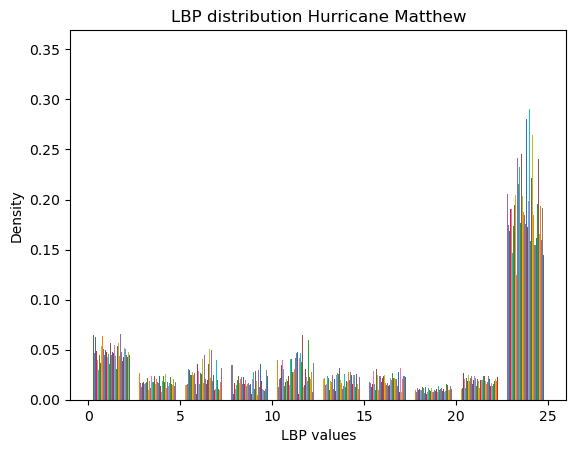

In [108]:
print(get_local_binary_pattern(hurricane_image_list[0]))

hurricane_binary_edges = []
hurricane_binary_edges_agg = []
hurricane_binary_edges_min = []
hurricane_binary_edges_max = []

for i in range(len(hurricane_image_list)):
    image = data["hurricane-matthew"]["images"][i]

    lbp = get_local_binary_pattern(image, radius=3)
    hurricane_binary_edges.append(lbp.flatten())
    hurricane_binary_edges_agg.append(np.mean(lbp))
    hurricane_binary_edges_min.append(np.min(lbp))
    hurricane_binary_edges_max.append(np.max(lbp))
    

hurricane_df["binary edges avg"] = hurricane_binary_edges_agg
hurricane_df["binary edges max"] = hurricane_binary_edges_max
hurricane_df["binary edges min"] = hurricane_binary_edges_min

plt.figure()
plt.hist(hurricane_binary_edges, density = True)
plt.xlabel("LBP values")
plt.ylabel("Density")
plt.title("LBP distribution Hurricane Matthew")

## Flooding LBP

Text(0.5, 1.0, 'LBP distribution flooding')

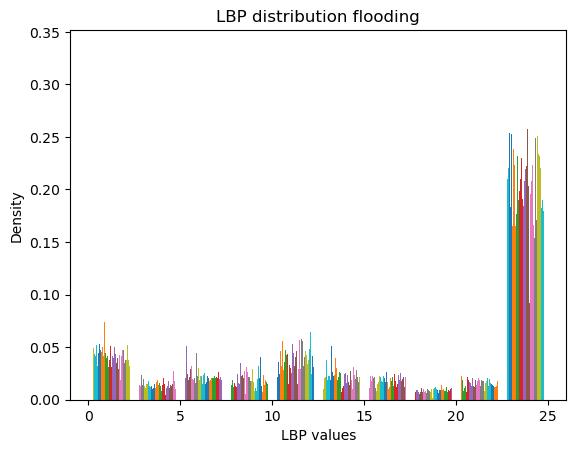

In [110]:
flooding_binary_edges = []
flooding_binary_edges_agg = []
flooding_binary_edges_median = []
flooding_binary_edges_min = []
flooding_binary_edges_max = []
for i in range(len(flooding_image_list)):
    image = data["midwest-flooding"]["images"][i]

    lbp = get_local_binary_pattern(image,radius=3)
    flooding_binary_edges.append(lbp.flatten())
    flooding_binary_edges_agg.append(np.mean(lbp))
    flooding_binary_edges_median.append(np.median(lbp))
    flooding_binary_edges_min.append(np.min(lbp)) 
    flooding_binary_edges_max.append(np.max(lbp))


flooding_df["binary edges avg"] = flooding_binary_edges_agg

flooding_df["binary edges median"] = flooding_binary_edges_median
flooding_df["binary edges max"] = flooding_binary_edges_max
flooding_df["binary edges min"] = flooding_binary_edges_min
plt.figure()
plt.hist(flooding_binary_edges, density = True)
plt.xlabel("LBP values")
plt.ylabel("Density")
plt.title("LBP distribution flooding")


## So-Cal fire LBP

Text(0.5, 1.0, 'LBP distribution Socal-Fire')

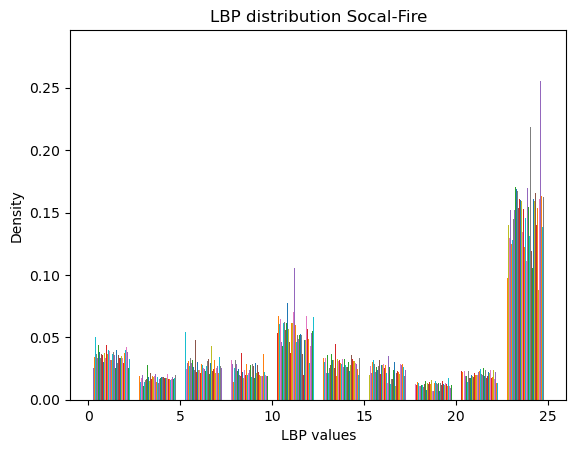

In [111]:
fire_binary_edges = []
fire_binary_edges_agg = []
fire_binary_edges_median = []
fire_binary_edges_max = []
fire_binary_edges_min = []

for i in range(len(fire_image_list)):
    image = data["socal-fire"]["images"][i]

    lbp = get_local_binary_pattern(image, radius=3)
    fire_binary_edges.append(lbp.flatten())
    fire_binary_edges_agg.append(np.mean(lbp))
    fire_binary_edges_median.append(np.median(lbp))
    fire_binary_edges_max.append(np.max(lbp))
    fire_binary_edges_min.append(np.min(lbp))

fire_df["binary edges avg"] = fire_binary_edges_agg
fire_df["binary edges median"] = fire_binary_edges_median
fire_df["bianry edges max"] = fire_binary_edges_max
fire_df["binary edges min"] = fire_binary_edges_min

plt.figure()
plt.hist(fire_binary_edges, density = True)
plt.xlabel("LBP values")
plt.ylabel("Density")
plt.title("LBP distribution Socal-Fire")

## How are the distributions "separable"?

The below are a non-exhaustive list of ways we can think about classifying these disaster images. You do not have to include all of them in your analysis.

### 1. `midwest-flooding` vs `socal-fire`

Among the different disaster events, are there are distinctions in:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?



Distributions are separable between midwest-flooding and so-cal fire with respect to RBG value. 

## distribution of reds for flooding  vs socal fires

In [65]:
display(flooding_df)
display(fire_df)

,image,image height,image width,image area,damage_labels,red avg values,green avg values,blue avg values,sobel edges avg,binary edges avg,red values,green values,blue values,sobel edges max,sobel edges min
0,0,42,176,7392,0,99.101461,99.101461,99.101461,0.023776,18.618803,99.101461,99.101461,99.101461,0.191593,0.000071
1,1,163,189,30807,0,92.032590,92.032590,92.032590,0.022366,18.618803,92.032590,92.032590,92.032590,0.291201,0.000000
2,2,72,72,5184,0,70.652585,70.652585,70.652585,0.026031,18.618803,70.652585,70.652585,70.652585,0.164833,0.000152
3,3,46,48,2208,0,122.410779,122.410779,122.410779,0.050201,18.618803,122.410779,122.410779,122.410779,0.462310,0.000395
4,4,80,63,5040,1,49.225397,49.225397,49.225397,0.027389,18.618803,49.225397,49.225397,49.225397,0.373165,0.000225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,6999,29,29,841,0,90.083234,90.083234,90.083234,0.024533,18.618803,90.083234,90.083234,90.083234,0.121864,0.000283
7000,7000,144,39,5616,0,95.705306,95.705306,95.705306,0.033180,18.618803,95.705306,95.705306,95.705306,0.293021,0.000314
7001,7001,86,64,5504,0,64.786156,64.786156,64.786156,0.024502,18.618803,64.786156,64.786156,64.786156,0.202449,0.000348
7002,7002,116,140,16240,0,47.415948,47.415948,47.415948,0.021576,18.618803,47.415948,47.415948,47.415948,0.336573,0.000071


,image,image height,image width,image area,damage_labels,red avg value,green avg value,blue avg value,sobel edges avg,binary edges avg,red value,green value,blue value,sobel edges max,sobel edges min,binary edges median,bianry edges max,binary edges min
0,0,144,195,28080,0,110.409046,131.513390,126.103811,0.048752,18.618803,110.409046,131.513390,126.103811,0.411398,0.000155,25.0,25.0,0.0
1,1,48,51,2448,0,70.399918,89.844771,87.334559,0.046197,18.618803,70.399918,89.844771,87.334559,0.468681,0.000665,25.0,25.0,0.0
2,2,104,140,14560,0,97.319162,122.642376,111.622184,0.043064,18.618803,97.319162,122.642376,111.622184,0.468500,0.000202,25.0,25.0,0.0
3,3,128,138,17664,0,96.571841,113.395041,108.018512,0.044347,18.618803,96.571841,113.395041,108.018512,0.385318,0.000071,25.0,25.0,0.0
4,4,65,96,6240,0,76.582532,103.573878,99.056731,0.037459,18.618803,76.582532,103.573878,99.056731,0.375931,0.000006,25.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8375,8375,128,140,17920,0,98.474777,121.614676,119.670647,0.045049,18.618803,98.474777,121.614676,119.670647,0.361869,0.000071,25.0,25.0,0.0
8376,8376,161,178,28658,0,92.791193,113.378289,104.831461,0.033567,18.618803,92.791193,113.378289,104.831461,0.447560,0.000100,25.0,25.0,0.0
8377,8377,56,49,2744,0,79.262391,99.185860,102.973761,0.041510,18.618803,79.262391,99.185860,102.973761,0.157803,0.000000,25.0,25.0,0.0
8378,8378,98,121,11858,0,86.740175,110.666639,102.787823,0.046559,18.618803,86.740175,110.666639,102.787823,0.320552,0.000348,25.0,25.0,0.0


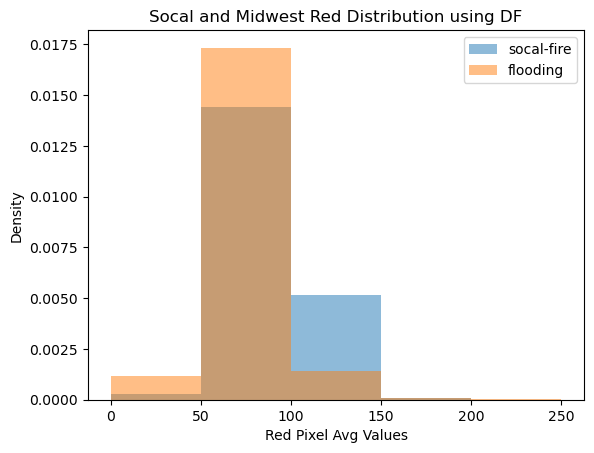

In [72]:

##plotting using DF avg
fig, ax = plt.subplots()
ax.hist(fire_df["red value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(flooding_df["red values"], bins = color_bins, alpha=0.5, density = True, label = 'flooding')
plt.legend()
plt.title('Socal and Midwest Red Distribution using DF')
plt.xlabel('Red Pixel Avg Values')
plt.ylabel('Density')
plt.show()

## distribution of greens for flooding vs socal-fires

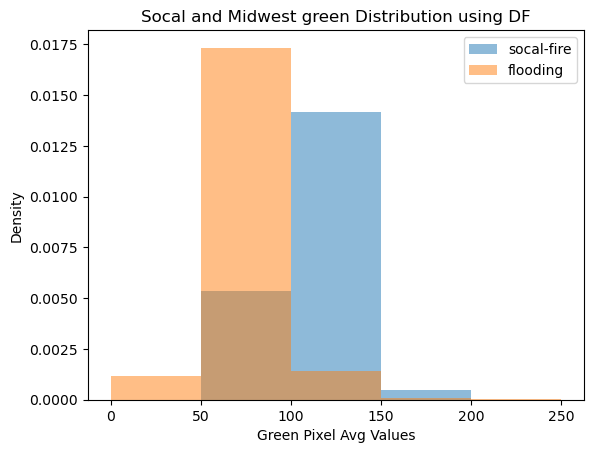

In [73]:

##plotting using DF avg
fig, ax = plt.subplots()
ax.hist(fire_df["green value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(flooding_df["green values"], bins = color_bins, alpha=0.5, density = True, label = 'flooding')
plt.legend()
plt.title('Socal and Midwest green Distribution using DF')
plt.xlabel('Green Pixel Avg Values')
plt.ylabel('Density')
plt.show()

## Distribution of blues for flooding vs socal - fires

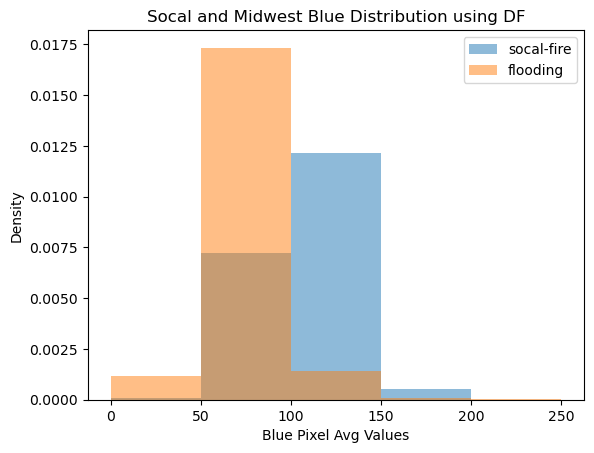

In [74]:
##plotting using DF avg
fig, ax = plt.subplots()
ax.hist(fire_df["blue value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(flooding_df["blue values"], bins = color_bins, alpha=0.5, density = True, label = 'flooding')
plt.legend()
plt.title('Socal and Midwest Blue Distribution using DF')
plt.xlabel('Blue Pixel Avg Values')
plt.ylabel('Density')
plt.show()

# avg sobel edges comparing flooding vs socal-fires

In [76]:
print(flooding_df['sobel edges avg'])

0       0.023776
1       0.022366
2       0.026031
3       0.050201
4       0.027389
          ...   
6999    0.024533
7000    0.033180
7001    0.024502
7002    0.021576
7003    0.021742
Name: sobel edges avg, Length: 7004, dtype: float64


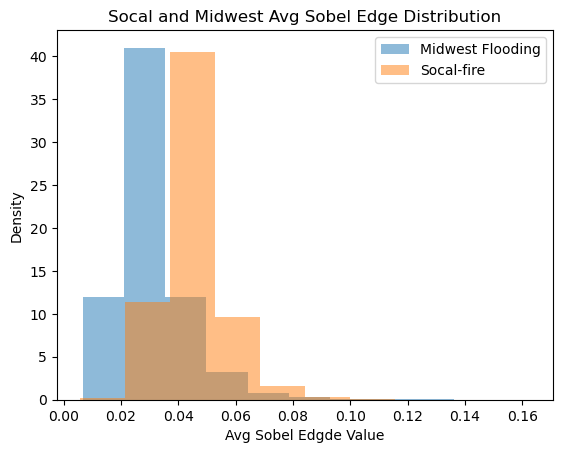

In [80]:
#flooding_sobel_bins = np.arange(np.max(flooding_df['sobel edges avg']), np.min(flooding_df['sobel edges avg']))
#fire_sobel_bins = np.arange(np.max(fire_df['sobel edges avg']), np.min(fire_df['sobel edges avg']))

fig, ax = plt.subplots()
ax.hist(flooding_df['sobel edges avg'], density = True, alpha=0.5, label='Midwest Flooding')
ax.hist(fire_df["sobel edges avg"], density = True, alpha = 0.5, label='Socal-fire')
plt.legend()
plt.title('Socal and Midwest Avg Sobel Edge Distribution')
plt.xlabel('Avg Sobel Edgde Value')
plt.ylabel('Density')
plt.show()

## avg local binary pattern comparing flooding vs socal-fires

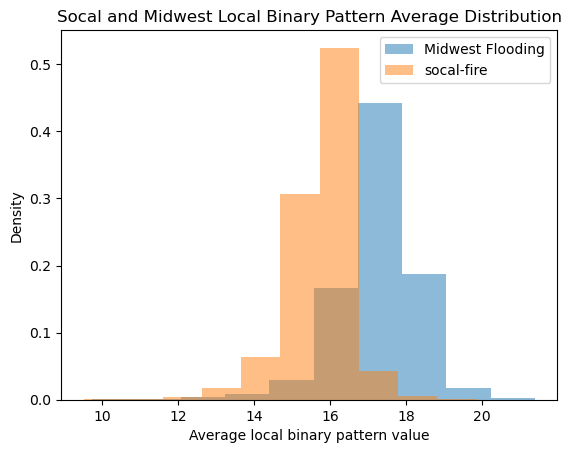

In [113]:
#flooding_lbp_bins = np.arange(max(flooding_df["binary edges avg"]), np.min(flooding_df["binary edges avg"]))
#fire_lbp_bins = np.arange(max(fire_df["binary edges avg"]), min(fire_df["binary edges avg"]))

fig, ax = plt.subplots()
ax.hist(flooding_df["binary edges avg"], density = True, alpha=0.5, label='Midwest Flooding')
ax.hist(fire_df["binary edges avg"], alpha = 0.5, density = True, label = "socal-fire")
plt.legend()
plt.title('Socal and Midwest Local Binary Pattern Average Distribution')
plt.xlabel('Average local binary pattern value')
plt.ylabel('Density')
plt.show()

### 2. Damage levels 1 vs 3 within the `hurricane-matthew` dataset

Is there a relationship between the damage level and:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?

## RBG values and varying damage levels Hurricane Matthew

In [86]:
display(hurricane_df)

,image,image height,image width,image area,damage_labels,red values,green values,blue values,sobel edges avg,binary edges avg,sobel edges min,sobel edges max,binary edges max,binary edges min
0,0,65,54,3510,3,75.702279,105.275783,101.084046,0.057136,18.618803,4.000296e-04,0.465451,25.0,0.0
1,1,67,105,7035,0,88.451599,119.422886,110.248330,0.037588,18.618803,4.098236e-04,0.297037,25.0,0.0
2,2,54,56,3024,1,111.971561,122.160714,119.043320,0.066945,18.618803,8.475130e-04,0.531265,25.0,0.0
3,3,114,124,14136,0,96.979697,128.503962,127.725382,0.025929,18.618803,1.962616e-17,0.410588,25.0,0.0
4,4,58,51,2958,2,87.179851,108.778905,96.311359,0.064856,18.618803,6.472394e-04,0.418363,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11146,11146,55,49,2695,3,82.250093,111.015955,111.285343,0.049909,18.618803,4.119553e-04,0.284661,25.0,0.0
11147,11147,80,35,2800,0,73.345714,105.581786,92.268571,0.031114,18.618803,6.010582e-04,0.247990,25.0,0.0
11148,11148,49,45,2205,2,87.194558,108.282993,90.125624,0.071930,18.618803,1.875365e-03,0.466706,25.0,0.0
11149,11149,40,46,1840,3,53.797283,81.159783,70.249457,0.031701,18.618803,7.436585e-04,0.153482,25.0,0.0


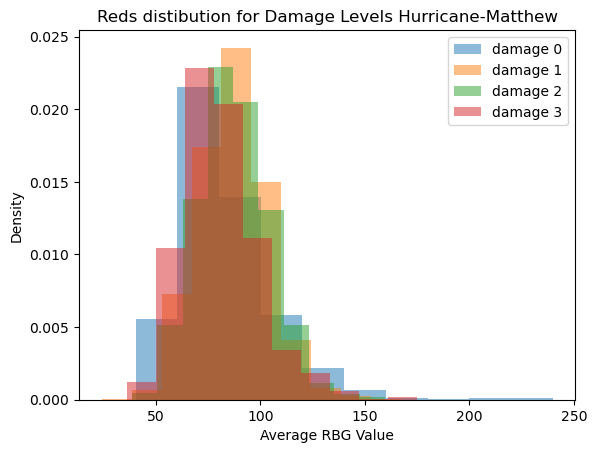

In [133]:
hurricane_damage_0 = hurricane_df[hurricane_df["damage_labels"] == 0]
#display(hurricane_damage_0)
hurricane_damage_1 = hurricane_df[hurricane_df["damage_labels"] == 1]
hurricane_damage_2 = hurricane_df[hurricane_df["damage_labels"] == 2]
hurricane_damage_3 = hurricane_df[hurricane_df["damage_labels"] == 3]

damage_level_df = [hurricane_damage_0, hurricane_damage_1, hurricane_damage_2, hurricane_damage_3]

plt.hist(hurricane_damage_0["red values"], density= True, alpha=0.5, label ='damage 0')
plt.hist(hurricane_damage_1["red values"], density = True, alpha = 0.5, label = "damage 1")
plt.hist(hurricane_damage_2["red values"], density = True, alpha = 0.5, label = 'damage 2')
plt.hist(hurricane_damage_3["red values"], density= True, alpha=0.5, label ='damage 3')
plt.title("Reds distibution for Damage Levels Hurricane-Matthew")
plt.ylabel("Density")
plt.xlabel("Average RBG Value")
plt.legend()
plt.show()

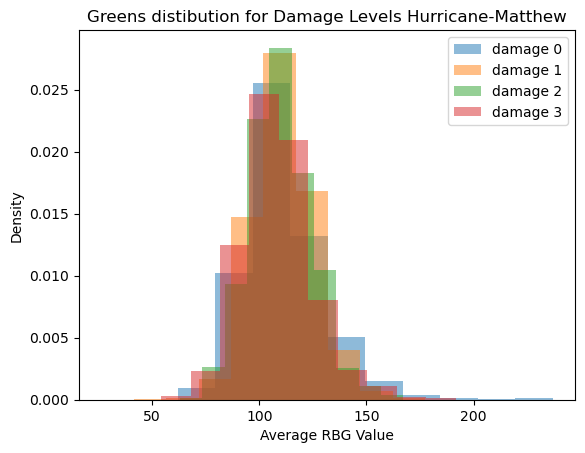

In [134]:
plt.hist(hurricane_damage_0["green values"], density= True, alpha=0.5, label ='damage 0')
plt.hist(hurricane_damage_1["green values"], density = True, alpha = 0.5, label = "damage 1")
plt.hist(hurricane_damage_2["green values"], density = True, alpha = 0.5, label = 'damage 2')
plt.hist(hurricane_damage_3["green values"], density= True, alpha=0.5, label ='damage 3')
plt.title("Greens distibution for Damage Levels Hurricane-Matthew")
plt.ylabel("Density")
plt.xlabel("Average RBG Value")
plt.legend()
plt.show()

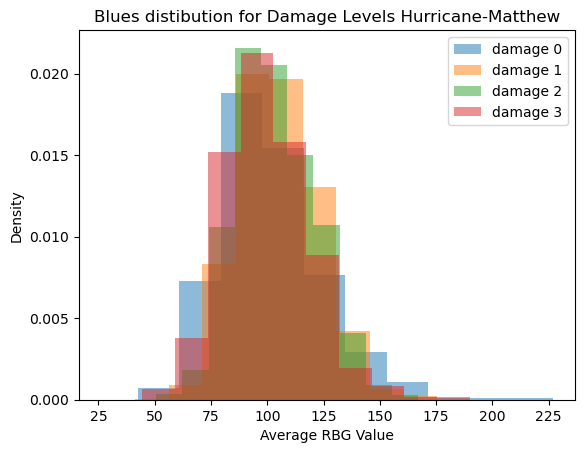

In [135]:
plt.hist(hurricane_damage_0["blue values"], density= True, alpha=0.5, label ='damage 0')
plt.hist(hurricane_damage_1["blue values"], density = True, alpha = 0.5, label = "damage 1")
plt.hist(hurricane_damage_2["blue values"], density = True, alpha = 0.5, label = 'damage 2')
plt.hist(hurricane_damage_3["blue values"], density= True, alpha=0.5, label ='damage 3')
plt.title("Blues distibution for Damage Levels Hurricane-Matthew")
plt.ylabel("Density")
plt.xlabel("Average RBG Value")
plt.legend()
plt.show()

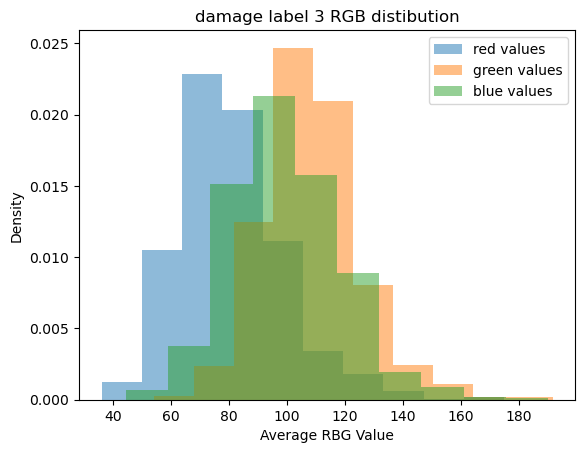

In [123]:
plt.hist(hurricane_damage_3["red values"], density= True, alpha=0.5, label ='red values')
plt.hist(hurricane_damage_3["green values"], density= True, alpha = 0.5, label = "green values")
plt.hist(hurricane_damage_3["blue values"], density = True, alpha = 0.5, label = 'blue values')
plt.title("damage label 3 RGB distibution")
plt.ylabel("Density")
plt.xlabel("Average RBG Value")
plt.legend()
plt.show()

In [ ]:
# # compare RBG value to damage level

# damage_level_color = {0: {'reds': [], 'greens': [], 'blues': []}, 
#                      1: {'reds': [], 'greens': [], 'blues': []},
#                      2: {'reds': [], 'greens': [], 'blues': []}, 
#                      3: {'reds': [], 'greens': [], 'blues': []}}

# for i in range(len(data["hurricane-matthew"]["images"])): # for each image extract rgb and append to list
#     image = data["hurricane-matthew"]["images"][i]
#     damage_level = data["hurricane-matthew"]["labels"][i]
#     for j in range(image.shape[0]): # index into each row, j is row
#         for n in range(image.shape[1]): # each pixel, n is column
#             damage_level_color[damage_level]["reds"].append(data["hurricane-matthew"]["images"][i][j][n][0]) 
#             damage_level_color[damage_level]["greens"].append(data["hurricane-matthew"]["images"][i][j][n][1]) 
#             damage_level_color[damage_level]["blues"].append(data["hurricane-matthew"]["images"][i][j][n][2]) 


In [ ]:
# colors = ["reds", "greens", "blues"]
# fig, axs = plt.subplots(len(damage_level_color), len(colors), figsize=(15, 10))

# for key in damage_level_color.keys():
#     for idx, color in enumerate(colors):
#         #plt.hist(damage_level_color[key], density = True); # show the distribution of color for category
#         axs[key, idx].hist(damage_level_color[key][color][:1000], density = True); # show the distribution of reds for given category
#         axs[key, idx].set_title(f"Distribution of {color} values for damage level {key}")
#         axs[key, idx].set_xlabel(f"{color} values")
#         axs[key, idx].set_ylabel("Density")

# plt.tight_layout()
# plt.show()

In [ ]:
# damage_level_color_mean = {0: {'reds': [], 'greens': [], 'blues': []}, 
#                      1: {'reds': [], 'greens': [], 'blues': []},
#                      2: {'reds': [], 'greens': [], 'blues': []}, 
#                      3: {'reds': [], 'greens': [], 'blues': []}}

# for key in damage_level_color.keys():
#     for color in colors:
#         #plt.hist(damage_level_color[key], density = True); # show the distribution of color for category
#         #axs[key, idx].hist(damage_level_color[key][color][:1000], density = True); # show the distribution of reds for given category
#         damage_level_color_mean[key][color] = np.mean(damage_level_color[key][color])
#         #print(f"Average value for {color} for Damage level {key}: {damage_level_color_mean[key][color]}")


## comparing avg sobel edge and damage level hurricane matthew (histograms)

In [157]:
# Sobel Edges
hurricane_damage_0 = hurricane_df[hurricane_df["damage_level"] == 0]
hurricane_damage_1 = hurricane_df[hurricane_df["damage_level"] == 1]
hurricane_damage_2 = hurricane_df[hurricane_df["damage_level"] == 2]
hurricane_damage_3 = hurricane_df[hurricane_df["damage_level"] == 3]

damage_level_df = [hurricane_damage_0, hurricane_damage_1, hurricane_damage_2, hurricane_damage_3]

fig, axs = plt.subplots()
for i in range (0, 3):
    axs[i].hist(damage_level_df[i]["sobel edges avg"], density = True)
    # axs[i].hist(damage_level_df[i]["sobel edges min"], density = True)
    # axs[i].hist(damage_level_df[i]["sobel edges max"], density = True)
    axs[i].set_title(f"Distribution of Average Sobel Edges for Damage Level {i}")
    axs[i].set_xlabel(f" Sobel Edge for Each Image")
    axs[i].set_ylabel(f"Density")

plt.show()

plt.hist(hurricane_damage_2["red values"], density= True, alpha=0.5, label ='red values')
plt.hist(hurricane_damage_2["green values"], densit) = True, alpha = 0.5, label = "green values"
plt.hist(hurricane_damage_2["blue values"], density = True, alpha = 0.5, label = 'blue values')
plt.title("damage label 2 RGB distibution")
plt.ylabel("Density")
plt.xlabel("Average RBG Value")
plt.legend()
plt.show()
plt.show()
    

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1743926415.py, line 21)

In [100]:
display(hurricane_damage_3)

,image,image height,image width,image area,damage_labels,red values,green values,blue values,sobel edges avg,binary edges avg,sobel edges min,sobel edges max,binary edges max,binary edges min
0,0,65,54,3510,3,75.702279,105.275783,101.084046,0.057136,18.618803,0.000400,0.465451,25.0,0.0
11,11,37,32,1184,3,76.732264,109.477196,102.429899,0.055809,18.618803,0.002410,0.314081,25.0,0.0
32,32,61,87,5307,3,89.646693,120.891653,115.848502,0.063293,18.618803,0.000208,0.372923,25.0,0.0
34,34,60,55,3300,3,57.261515,84.385152,61.161212,0.043201,18.618803,0.000141,0.193940,25.0,0.0
46,46,50,56,2800,3,73.882857,109.237857,102.159643,0.054190,18.618803,0.000503,0.352698,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127,11127,33,39,1287,3,84.815074,109.400932,91.142968,0.031464,18.618803,0.001148,0.149665,25.0,0.0
11142,11142,42,44,1848,3,102.786797,128.477814,134.385823,0.040971,18.618803,0.000223,0.224405,25.0,0.0
11143,11143,29,22,638,3,57.186520,86.042320,75.800940,0.028290,18.618803,0.001253,0.100520,25.0,0.0
11146,11146,55,49,2695,3,82.250093,111.015955,111.285343,0.049909,18.618803,0.000412,0.284661,25.0,0.0


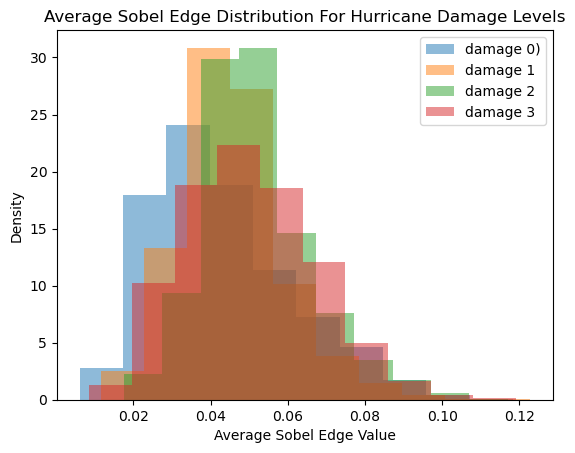

In [152]:
plt.hist(hurricane_damage_0["sobel edges avg"], density= True, alpha=0.5, label ='damage 0)')
plt.hist(hurricane_damage_1["sobel edges avg"], density= True, alpha = 0.5, label = "damage 1")
plt.hist(hurricane_damage_2["sobel edges avg"], density = True, alpha = 0.5, label = 'damage 2')
plt.hist(hurricane_damage_3["sobel edges avg"], density = True, alpha = 0.5, label = 'damage 3')
plt.title("Average Sobel Edge Distribution For Hurricane Damage Levels")
plt.ylabel("Density")
plt.xlabel("Average Sobel Edge Value")
plt.legend()
plt.show()

## comparing avg local binary pattern and damage level hurricane matthew (histograms)

In [ ]:
# # Local Binary Patterns
# fig, axs = plt.subplots()
# for i in range (0, 3):
#     axs[i].hist(damage_level_df[i]["binary edges avg"], density = True)
#     # axs[i].hist(damage_level_df[i]["binary edges min"], density = True)
#     # axs[i].hist(damage_level_df[i]["binary edges max"], density = True)
#     axs[i].set_title(f"Distribution of Average Local Binary Edges for Damage Level {i}")
#     axs[i].set_xlabel(f"Average Local Binary Endge for Each Image")
#     axs[i].set_ylabel(f"Density")
# plt.show()

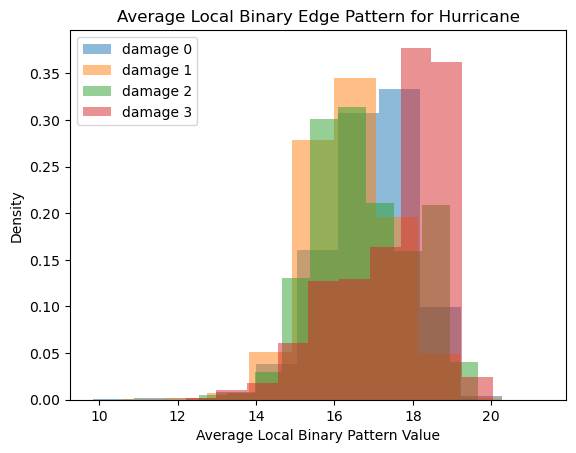

In [150]:
plt.hist(hurricane_damage_0["binary edges avg"], density= True, alpha=0.5, label ='damage 0')
plt.hist(hurricane_damage_1["binary edges avg"], density= True, alpha = 0.5, label = "damage 1")
plt.hist(hurricane_damage_2["binary edges avg"], density = True, alpha = 0.5, label = 'damage 2')
plt.hist(hurricane_damage_3["binary edges avg"], density = True, alpha = 0.5, label = 'damage 3')
plt.title("Average Local Binary Edge Pattern for Hurricane")
plt.ylabel("Density")
plt.xlabel("Average Local Binary Pattern Value")
plt.legend()
plt.show()

## histogram for image sizes for disaster

In [112]:
display(flooding_df)

,image,image height,image width,image area,damage_labels,red avg values,green avg values,blue avg values,sobel edges avg,binary edges avg,red values,green values,blue values,sobel edges max,sobel edges min,binary edges median,binary edges max,binary edges min
0,0,42,176,7392,0,99.101461,99.101461,99.101461,0.023776,17.573864,99.101461,99.101461,99.101461,0.191593,0.000071,23.0,25.0,0.0
1,1,163,189,30807,0,92.032590,92.032590,92.032590,0.022366,17.751096,92.032590,92.032590,92.032590,0.291201,0.000000,23.0,25.0,0.0
2,2,72,72,5184,0,70.652585,70.652585,70.652585,0.026031,16.970872,70.652585,70.652585,70.652585,0.164833,0.000152,22.0,25.0,0.0
3,3,46,48,2208,0,122.410779,122.410779,122.410779,0.050201,15.889946,122.410779,122.410779,122.410779,0.462310,0.000395,15.0,25.0,0.0
4,4,80,63,5040,1,49.225397,49.225397,49.225397,0.027389,18.269444,49.225397,49.225397,49.225397,0.373165,0.000225,25.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,6999,29,29,841,0,90.083234,90.083234,90.083234,0.024533,17.525565,90.083234,90.083234,90.083234,0.121864,0.000283,25.0,25.0,0.0
7000,7000,144,39,5616,0,95.705306,95.705306,95.705306,0.033180,16.901353,95.705306,95.705306,95.705306,0.293021,0.000314,18.0,25.0,0.0
7001,7001,86,64,5504,0,64.786156,64.786156,64.786156,0.024502,17.332122,64.786156,64.786156,64.786156,0.202449,0.000348,23.0,25.0,0.0
7002,7002,116,140,16240,0,47.415948,47.415948,47.415948,0.021576,17.893288,47.415948,47.415948,47.415948,0.336573,0.000071,24.0,25.0,0.0


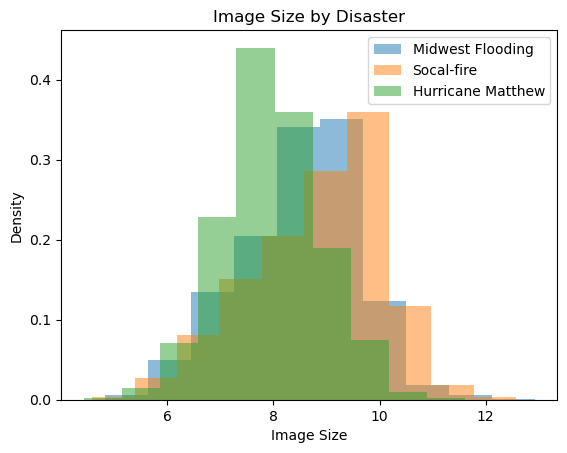

In [151]:
flooding_df["image area log"] = np.log(flooding_df["image area"])
fire_df["image area log"] = np.log(fire_df["image area"])
hurricane_df["image area log"] = np.log(hurricane_df["image area"])

plt.hist(flooding_df["image area log"], density= True, alpha=0.5, label ='Midwest Flooding')
plt.hist(fire_df["image area log"], density= True, alpha = 0.5, label = "Socal-fire")
plt.hist(hurricane_df["image area log"], density = True, alpha = 0.5, label = 'Hurricane Matthew')

plt.title("Image Size by Disaster")
plt.ylabel("Density")
plt.xlabel("Image Size")

plt.legend()
plt.show()

## save all dataframes as CSV files

In [165]:
hurricane_df.to_csv('hurricane.csv')
flooding_df.to_csv('floodinig.csv')
fire_df.to_csv('fire.csv')


## Distribution of damage label and disaster 

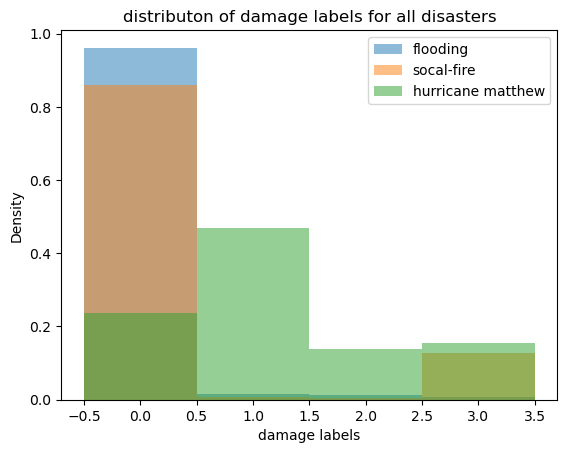

In [131]:
labels_bins = [-0.5,0.5,1.5,2.5,3.5]

plt.hist(flooding_df["damage_labels"], density= True, bins = labels_bins, alpha=0.5, label ='flooding')
plt.hist(fire_df["damage_labels"], density= True, bins = labels_bins, alpha = 0.5, label = "socal-fire")
plt.hist(hurricane_df["damage_labels"], bins = labels_bins, density = True, alpha = 0.5, label = 'hurricane matthew')

plt.title("distributon of damage labels for all disasters")
plt.ylabel("Density")
plt.xlabel("damage labels")
plt.legend()
plt.show()

## Fire - hurricane RBG

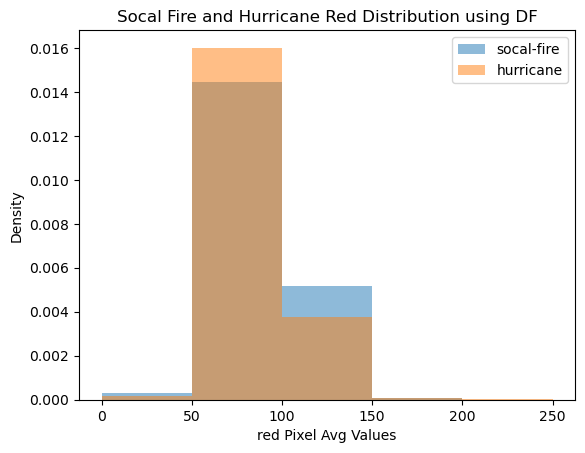

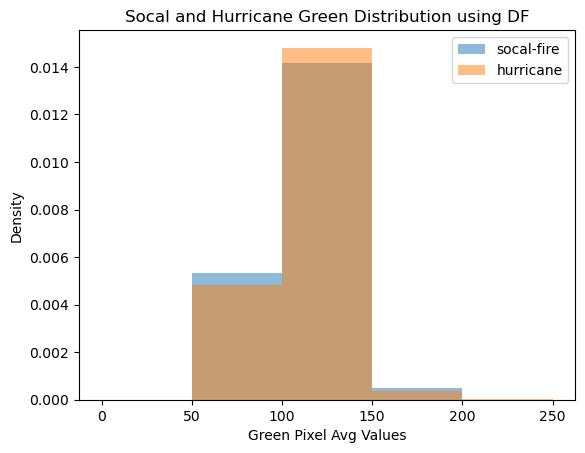

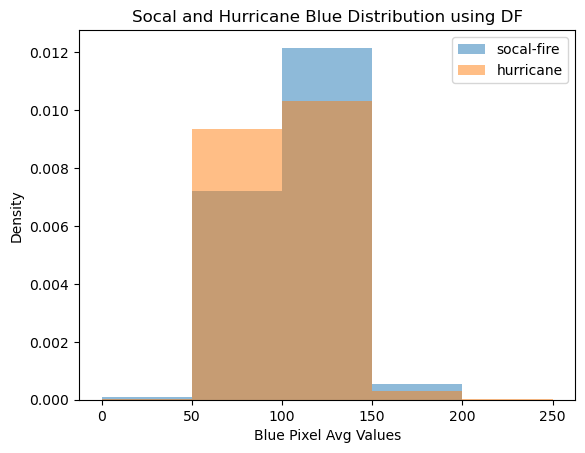

In [136]:
#red
fig, ax = plt.subplots()
ax.hist(fire_df["red value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(hurricane_df["red values"], bins = color_bins, alpha=0.5, density = True, label = 'hurricane')
plt.legend()
plt.title('Socal Fire and Hurricane Red Distribution using DF')
plt.xlabel('red Pixel Avg Values')
plt.ylabel('Density')
plt.show()

#green
fig, ax = plt.subplots()
ax.hist(fire_df["green value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(hurricane_df["green values"], bins = color_bins, alpha=0.5, density = True, label = 'hurricane')
plt.legend()
plt.title('Socal and Hurricane Green Distribution using DF')
plt.xlabel('Green Pixel Avg Values')
plt.ylabel('Density')
plt.show()

#blue
fig, ax = plt.subplots()
ax.hist(fire_df["blue value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(hurricane_df["blue values"], bins = color_bins, alpha=0.5, density = True, label = 'hurricane')
plt.legend()
plt.title('Socal and Hurricane Blue Distribution using DF')
plt.xlabel('Blue Pixel Avg Values')
plt.ylabel('Density')
plt.show()

## flooding - hurricane RGB

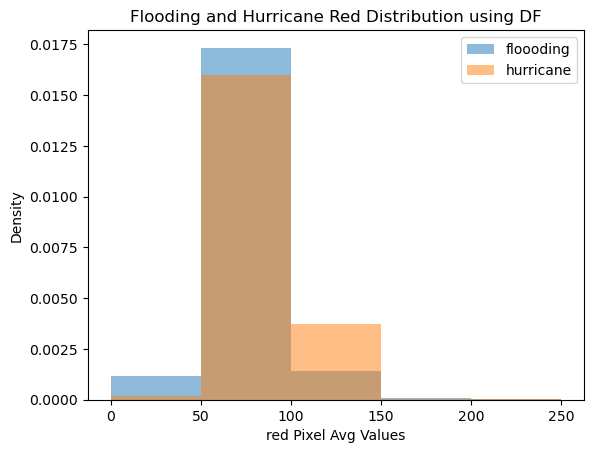

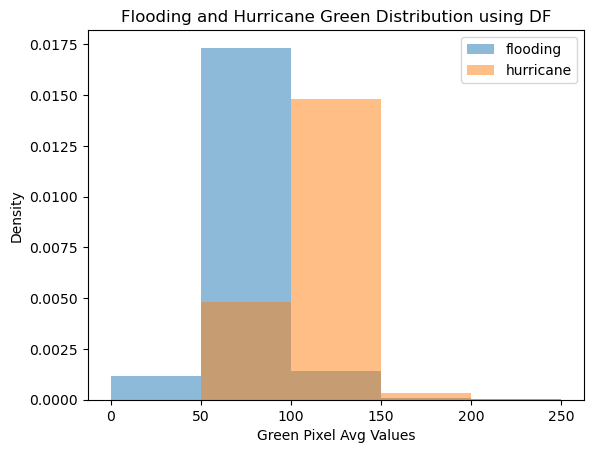

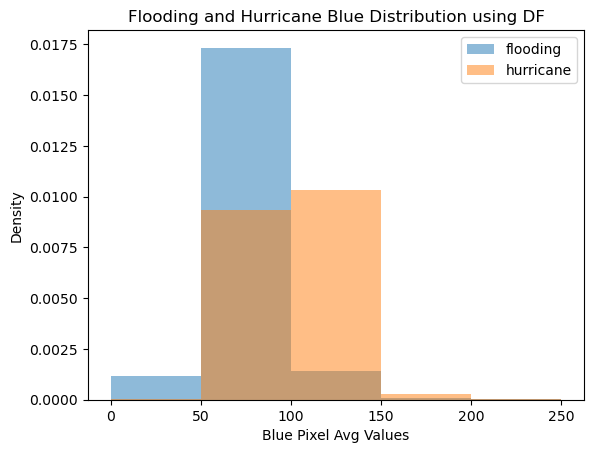

In [139]:
#red
fig, ax = plt.subplots()
ax.hist(flooding_df["red values"], bins = color_bins, alpha=0.5, density = True, label='floooding')
ax.hist(hurricane_df["red values"], bins = color_bins, alpha=0.5, density = True, label = 'hurricane')
plt.legend()
plt.title('Flooding and Hurricane Red Distribution using DF')
plt.xlabel('red Pixel Avg Values')
plt.ylabel('Density')
plt.show()

#green
fig, ax = plt.subplots()
ax.hist(flooding_df["green values"], bins = color_bins, alpha=0.5, density = True, label='flooding')
ax.hist(hurricane_df["green values"], bins = color_bins, alpha=0.5, density = True, label = 'hurricane')
plt.legend()
plt.title('Flooding and Hurricane Green Distribution using DF')
plt.xlabel('Green Pixel Avg Values')
plt.ylabel('Density')
plt.show()

#blue
fig, ax = plt.subplots()
ax.hist(flooding_df["blue values"], bins = color_bins, alpha=0.5, density = True, label='flooding')
ax.hist(hurricane_df["blue values"], bins = color_bins, alpha=0.5, density = True, label = 'hurricane')
plt.legend()
plt.title('Flooding and Hurricane Blue Distribution using DF')
plt.xlabel('Blue Pixel Avg Values')
plt.ylabel('Density')
plt.show()

# Flooding -fire

In [146]:
display(fire_df)

fire_df = fire_df.rename(columns = {'red value': 'red values'})
display(fire_df)

,image,image height,image width,image area,damage_labels,red avg value,green avg value,blue avg value,sobel edges avg,binary edges avg,red value,green value,blue value,sobel edges max,sobel edges min,binary edges median,bianry edges max,binary edges min,image area log
0,0,144,195,28080,0,110.409046,131.513390,126.103811,0.048752,16.013177,110.409046,131.513390,126.103811,0.411398,0.000155,15.0,25.0,0.0,10.242813
1,1,48,51,2448,0,70.399918,89.844771,87.334559,0.046197,15.777369,70.399918,89.844771,87.334559,0.468681,0.000665,17.0,25.0,0.0,7.803027
2,2,104,140,14560,0,97.319162,122.642376,111.622184,0.043064,15.734959,97.319162,122.642376,111.622184,0.468500,0.000202,15.0,25.0,0.0,9.586033
3,3,128,138,17664,0,96.571841,113.395041,108.018512,0.044347,15.904608,96.571841,113.395041,108.018512,0.385318,0.000071,16.0,25.0,0.0,9.779284
4,4,65,96,6240,0,76.582532,103.573878,99.056731,0.037459,16.025641,76.582532,103.573878,99.056731,0.375931,0.000006,16.0,25.0,0.0,8.738735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8375,8375,128,140,17920,0,98.474777,121.614676,119.670647,0.045049,15.995703,98.474777,121.614676,119.670647,0.361869,0.000071,16.0,25.0,0.0,9.793673
8376,8376,161,178,28658,0,92.791193,113.378289,104.831461,0.033567,16.512736,92.791193,113.378289,104.831461,0.447560,0.000100,17.0,25.0,0.0,10.263188
8377,8377,56,49,2744,0,79.262391,99.185860,102.973761,0.041510,15.831268,79.262391,99.185860,102.973761,0.157803,0.000000,17.0,25.0,0.0,7.917172
8378,8378,98,121,11858,0,86.740175,110.666639,102.787823,0.046559,16.403609,86.740175,110.666639,102.787823,0.320552,0.000348,18.0,25.0,0.0,9.380758


,image,image height,image width,image area,damage_labels,red avg value,green avg value,blue avg value,sobel edges avg,binary edges avg,red values,green value,blue value,sobel edges max,sobel edges min,binary edges median,bianry edges max,binary edges min,image area log
0,0,144,195,28080,0,110.409046,131.513390,126.103811,0.048752,16.013177,110.409046,131.513390,126.103811,0.411398,0.000155,15.0,25.0,0.0,10.242813
1,1,48,51,2448,0,70.399918,89.844771,87.334559,0.046197,15.777369,70.399918,89.844771,87.334559,0.468681,0.000665,17.0,25.0,0.0,7.803027
2,2,104,140,14560,0,97.319162,122.642376,111.622184,0.043064,15.734959,97.319162,122.642376,111.622184,0.468500,0.000202,15.0,25.0,0.0,9.586033
3,3,128,138,17664,0,96.571841,113.395041,108.018512,0.044347,15.904608,96.571841,113.395041,108.018512,0.385318,0.000071,16.0,25.0,0.0,9.779284
4,4,65,96,6240,0,76.582532,103.573878,99.056731,0.037459,16.025641,76.582532,103.573878,99.056731,0.375931,0.000006,16.0,25.0,0.0,8.738735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8375,8375,128,140,17920,0,98.474777,121.614676,119.670647,0.045049,15.995703,98.474777,121.614676,119.670647,0.361869,0.000071,16.0,25.0,0.0,9.793673
8376,8376,161,178,28658,0,92.791193,113.378289,104.831461,0.033567,16.512736,92.791193,113.378289,104.831461,0.447560,0.000100,17.0,25.0,0.0,10.263188
8377,8377,56,49,2744,0,79.262391,99.185860,102.973761,0.041510,15.831268,79.262391,99.185860,102.973761,0.157803,0.000000,17.0,25.0,0.0,7.917172
8378,8378,98,121,11858,0,86.740175,110.666639,102.787823,0.046559,16.403609,86.740175,110.666639,102.787823,0.320552,0.000348,18.0,25.0,0.0,9.380758


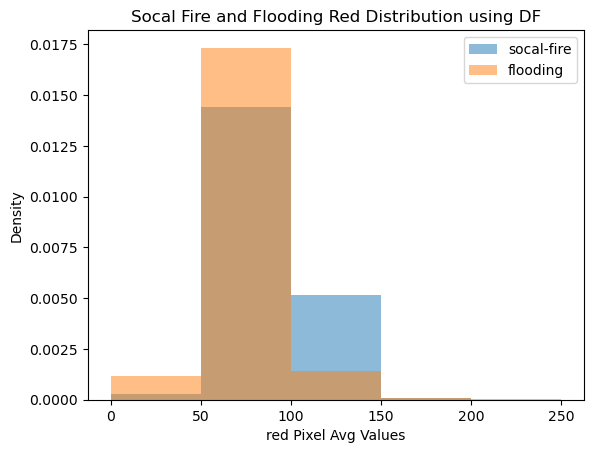

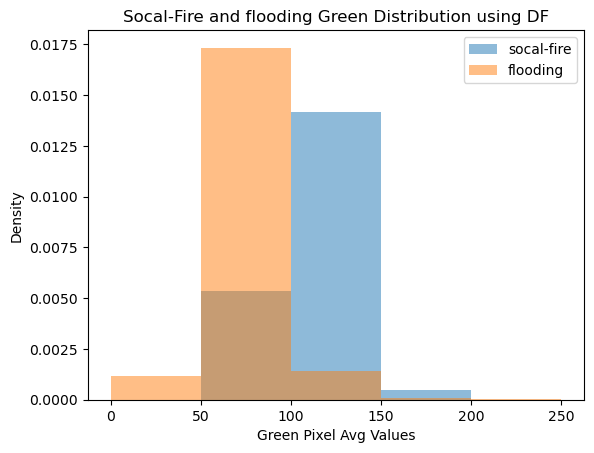

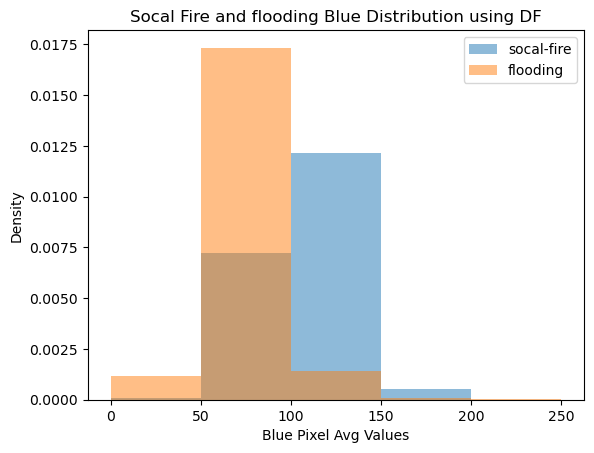

In [147]:
#red
fig, ax = plt.subplots()
ax.hist(fire_df["red values"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(flooding_df["red values"], bins = color_bins, alpha=0.5, density = True, label = 'flooding')
plt.legend()
plt.title('Socal Fire and Flooding Red Distribution using DF')
plt.xlabel('red Pixel Avg Values')
plt.ylabel('Density')
plt.show()

#green
fig, ax = plt.subplots()
ax.hist(fire_df["green value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(flooding_df["green values"], bins = color_bins, alpha=0.5, density = True, label = 'flooding')
plt.legend()
plt.title('Socal-Fire and flooding Green Distribution using DF')
plt.xlabel('Green Pixel Avg Values')
plt.ylabel('Density')
plt.show()

#blue
fig, ax = plt.subplots()
ax.hist(fire_df["blue value"], bins = color_bins, alpha=0.5, density = True, label='socal-fire')
ax.hist(flooding_df["blue values"], bins = color_bins, alpha=0.5, density = True, label = 'flooding')
plt.legend()
plt.title('Socal Fire and flooding Blue Distribution using DF')
plt.xlabel('Blue Pixel Avg Values')
plt.ylabel('Density')
plt.show()

## hurricane and gabor filter

In [153]:

theta = 0
sigma = 1.0
frequency = 0.1

kernel = generate_gabor_kernel(theta, sigma, frequency)
#gabor = get_gabor_features(img, kernel)

#print(get_local_binary_pattern(hurricane_image_list[0]))

hurricane_gabor = []
hurricane_gabor_agg = []
hurricane_gabor_min = []
hurricane_gabor_max = []

for i in range(len(hurricane_image_list)):
    image = data["hurricane-matthew"]["images"][i]

    gabor = get_gabor_features(image, kernel)
    hurricane_gabor.append(gabor.flatten())
    hurricane_gabor_agg.append(np.mean(gabor))
    hurricane_gabor_min.append(np.min(gabor))
    hurricane_gabor_max.append(np.max(gabor))

hurricane_df["gabor avg"] = hurricane_gabor_agg
hurricane_df["gabor max"] = hurricane_gabor_max
hurricane_df["gabor min"] = hurricane_gabor_min

## plot gabor avg for each damage level

In [163]:
display(hurricane_df)

,image,image height,image width,image area,damage_labels,red values,green values,blue values,sobel edges avg,binary edges avg,sobel edges min,sobel edges max,binary edges max,binary edges min,image area log,gabor avg,gabor max,gabor min
0,0,65,54,3510,3,75.702279,105.275783,101.084046,0.057136,18.618803,4.000296e-04,0.465451,25.0,0.0,8.163371,0.317689,0.645015,0.200102
1,1,67,105,7035,0,88.451599,119.422886,110.248330,0.037588,17.093248,4.098236e-04,0.297037,25.0,0.0,8.858653,0.361117,0.740910,0.196503
2,2,54,56,3024,1,111.971561,122.160714,119.043320,0.066945,18.507275,8.475130e-04,0.531265,25.0,0.0,8.014336,0.385552,0.799867,0.176524
3,3,114,124,14136,0,96.979697,128.503962,127.725382,0.025929,17.523911,1.962616e-17,0.410588,25.0,0.0,9.556480,0.391920,0.811727,0.214084
4,4,58,51,2958,2,87.179851,108.778905,96.311359,0.064856,15.157201,6.472394e-04,0.418363,25.0,0.0,7.992269,0.332500,0.740945,0.177243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11146,11146,55,49,2695,3,82.250093,111.015955,111.285343,0.049909,15.401484,4.119553e-04,0.284661,25.0,0.0,7.899153,0.337755,0.558316,0.124017
11147,11147,80,35,2800,0,73.345714,105.581786,92.268571,0.031114,16.690000,6.010582e-04,0.247990,25.0,0.0,7.937375,0.314735,0.744402,0.205460
11148,11148,49,45,2205,2,87.194558,108.282993,90.125624,0.071930,18.345578,1.875365e-03,0.466706,25.0,0.0,7.698483,0.329932,0.673887,0.191492
11149,11149,40,46,1840,3,53.797283,81.159783,70.249457,0.031701,18.771739,7.436585e-04,0.153482,25.0,0.0,7.517521,0.240010,0.343672,0.155803


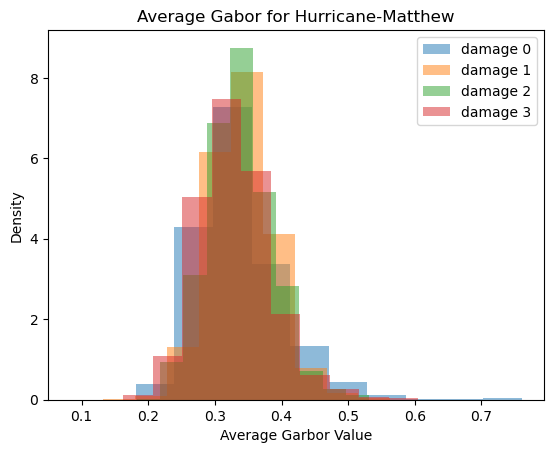

In [164]:
hurricane_damage_0 = hurricane_df[hurricane_df["damage_labels"] == 0]
hurricane_damage_1 = hurricane_df[hurricane_df["damage_labels"] == 1]
hurricane_damage_2 = hurricane_df[hurricane_df["damage_labels"] == 2]
hurricane_damage_3 = hurricane_df[hurricane_df["damage_labels"] == 3]

plt.hist(hurricane_damage_0["gabor avg"], density= True, alpha=0.5, label ='damage 0')
plt.hist(hurricane_damage_1["gabor avg"], density= True, alpha = 0.5, label = "damage 1")
plt.hist(hurricane_damage_2["gabor avg"], density = True, alpha = 0.5, label = 'damage 2')
plt.hist(hurricane_damage_3["gabor avg"], density = True, alpha = 0.5, label = 'damage 3')
plt.title("Average Gabor for Hurricane-Matthew")
plt.ylabel("Density")
plt.xlabel("Average Garbor Value")
plt.legend()
plt.show()